In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors 
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import draw_clusters

## Kmeans

K-means é um algoritmo de clusterização que agrupa um conjunto de observações em k grupos (clusters) com base em suas características ou similaridades.

<blockquote>
A célula abaixo carrega um arquivo csv 'buddymove_holidayiq.csv' usando a biblioteca pandas e mostra as cinco primeiras linhas do dataset.

Essa célula é útil para visualizar uma parte do dataset carregado e ter uma ideia de como as informações estão organizadas e distribuídas nas colunas. A coloração gradiente pode ajudar a destacar padrões e tendências nos dados de uma forma mais visual e intuitiva.
</blockquote>

In [ ]:
dataset = pd.read_csv('buddymove_holidayiq.csv')
dataset.head().style.background_gradient(cmap='YlOrBr').hide_index()

<ipython-input-3-6534d8a0a626>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  dataset.head().style.background_gradient(cmap='YlOrBr').hide_index()


User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 1,2,77,79,69,68,95
User 2,2,62,76,76,69,68
User 3,2,50,97,87,50,75
User 4,2,68,77,95,76,61
User 5,2,98,54,59,95,86


---
<blockquote>
Essa célula realiza a descrição estatística do conjunto de dados lido na célula anterior.

A descrição do conjunto de dados pode ser uma etapa importante na preparação dos dados antes de aplicar técnicas de clustering.
</blockquote>

In [ ]:
dataset.describe(include = "all")

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
unique,249,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,NaN,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,NaN,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,NaN,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,NaN,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,NaN,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000


---
<blockquote>
Aqui o Pairplot é usado para visualizar a relação entre todas as variáveis numéricas do dataset. Sem haver qualquer tipo de classificação ou agrupamento.
</blockquote>

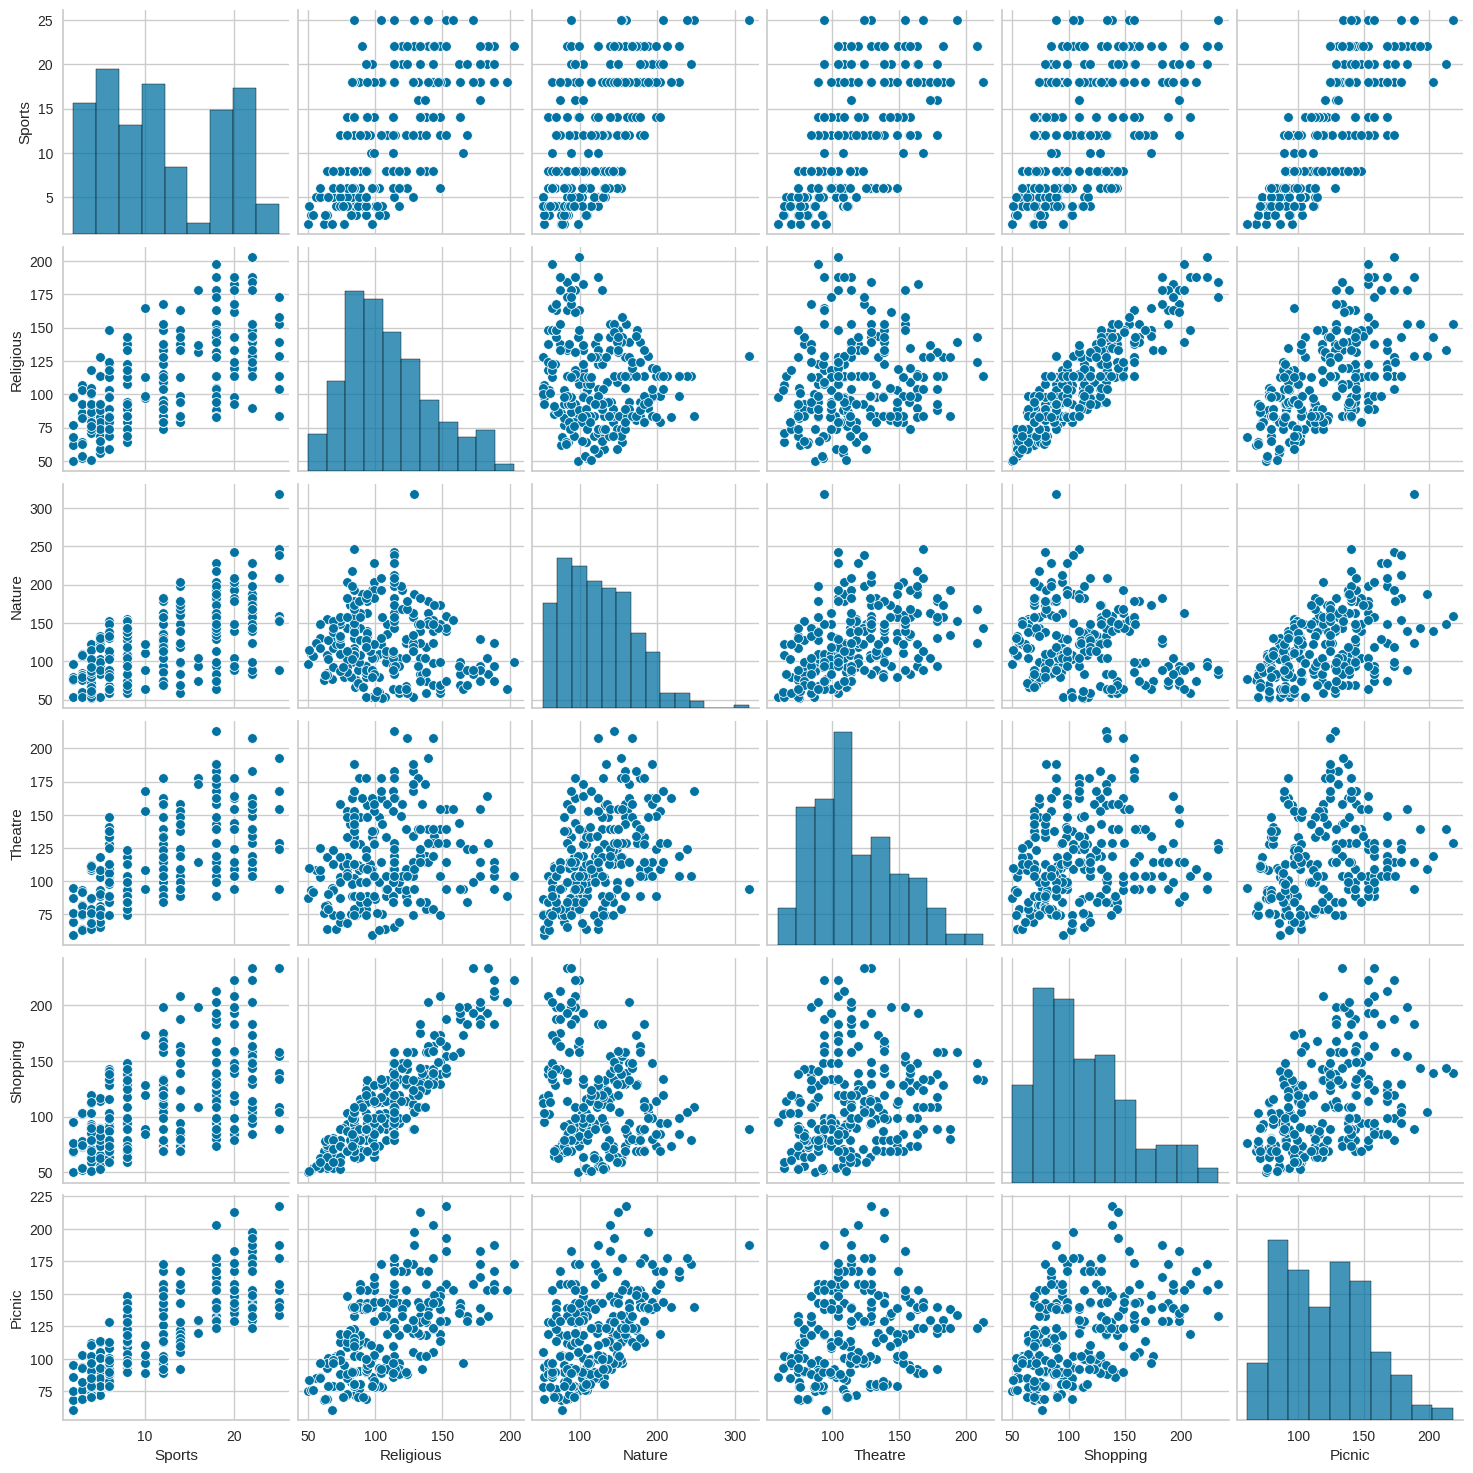

In [ ]:
sns.pairplot(dataset)

---
<blockquote>
Nessa etapa estamos selecionando e transformando em array as colunas que contêm as informações relevantes para a nossa análise, ou seja, as características dos usuários relacionadas às avaliações de destinos.

Este array será usado como entrada para a nossa análise de clustering, onde tentaremos agrupar usuários semelhantes com base em suas avaliações.
</blockquote>

In [ ]:
features = dataset.iloc[:, 1:7].values
features

array([[  2,  77,  79,  69,  68,  95],
       [  2,  62,  76,  76,  69,  68],
       [  2,  50,  97,  87,  50,  75],
       ...,
       [ 20, 124, 178, 104, 158, 174],
       [ 20, 133, 149, 139, 144, 213],
       [ 20, 143, 149, 139, 159, 143]])

---
<blockquote>
Na sequência aplicamos a técnica de normalização que transforma os dados de forma que eles fiquem dentro do intervalo [0, 1].

A normalização é útil no K-means porque ajuda a melhorar o desempenho do modelo, reduzindo a sensibilidade a valores discrepantes e melhorando a precisão dos resultados.
</blockquote>

In [ ]:
normalize = MinMaxScaler()
features = normalize.fit_transform(features)
features

array([[0.        , 0.17647059, 0.10150376, 0.06493506, 0.09836066,
        0.21656051],
       [0.        , 0.07843137, 0.09022556, 0.11038961, 0.10382514,
        0.04458599],
       [0.        , 0.        , 0.16917293, 0.18181818, 0.        ,
        0.08917197],
       ...,
       [0.7826087 , 0.48366013, 0.47368421, 0.29220779, 0.59016393,
        0.71974522],
       [0.7826087 , 0.54248366, 0.36466165, 0.51948052, 0.5136612 ,
        0.96815287],
       [0.7826087 , 0.60784314, 0.36466165, 0.51948052, 0.59562842,
        0.52229299]])

---
<blockquote>
Essa célula utiliza a análise de componentes principais (PCA) para reduzir a dimensionalidade dos dados.

O objetivo é reduzir o número de variáveis em um conjunto de dados, mantendo ao mesmo tempo a maior parte da variabilidade presente nos dados. O lado negativo é que pode haver perda de informações.
</blockquote>

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(features)

---
<blockquote>
Nessa etapa usamos a biblioteca 'yellowbrick' para plotar um gráfico que ajuda a identificar o número ideal de clusters para o algoritmo K-Means.

Essa técnica é chamada de "Elbow" e mostra a relação entre a soma dos quadrados das distâncias dentro do cluster (SSE) e o número de clusters. A partir desse gráfico, o número ideal de clusters pode ser identificado visualmente observando onde a diminuição na SSE se torna menos acentuada.
</blockquote>

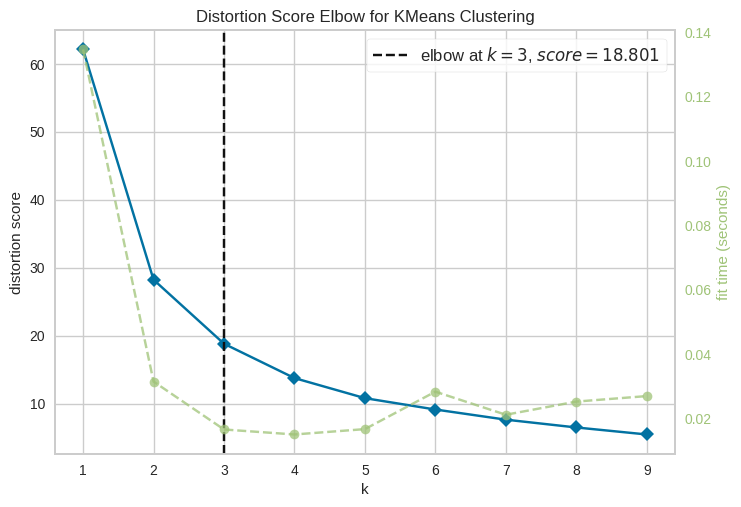

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_init=10)
vis = KElbowVisualizer(kmeans, k=(1,10))
vis.fit(X)
vis.poof()

Pelo gráfico vemos que o K ideal é 3, mas ele não parece tão óbvio assim. Talvez 2, 3 ou até mesmo 5 clustering também possam ser usados.

Com isso vamos utilizar o método da Silhouette para realizar essa análisa com outros números de clustering.

---

---
<blockquote>
Aqui um gráfico de Silhouette é criado para visualizar as pontuações de Silhouette de cada amostra em relação aos rótulos de cluster. Além disso um gráfico de dispersão é criado para exibir o agrupamento resultante com o número específico de clusters. 

Ao comparar o plot da Silhouette e o gráfico de dispersão, é possível determinar se o número de clusters escolhido pelo método Elbow é o ideal para o conjunto de dados. Se o valor médio do score da Silhouette for alto e os clusters estiverem bem definidos no gráfico de dispersão, isso indica que o número de clusters escolhido é apropriado.
</blockquote>

<ipython-input-10-4fbfd3352f7b>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


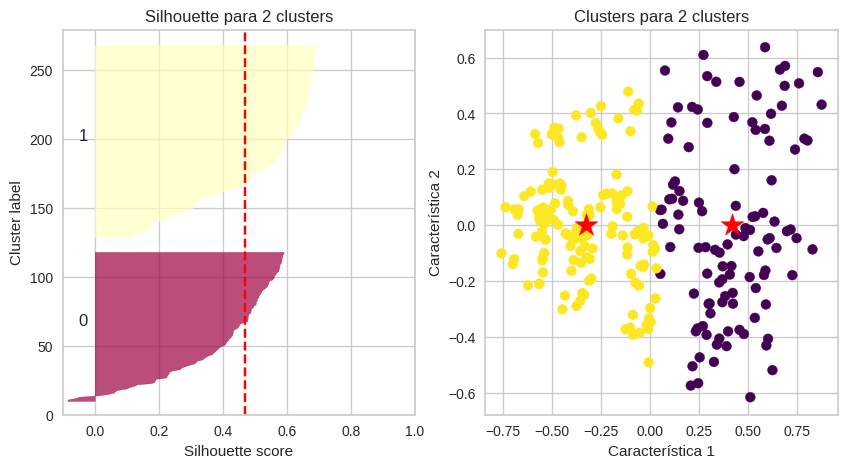

<ipython-input-10-4fbfd3352f7b>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


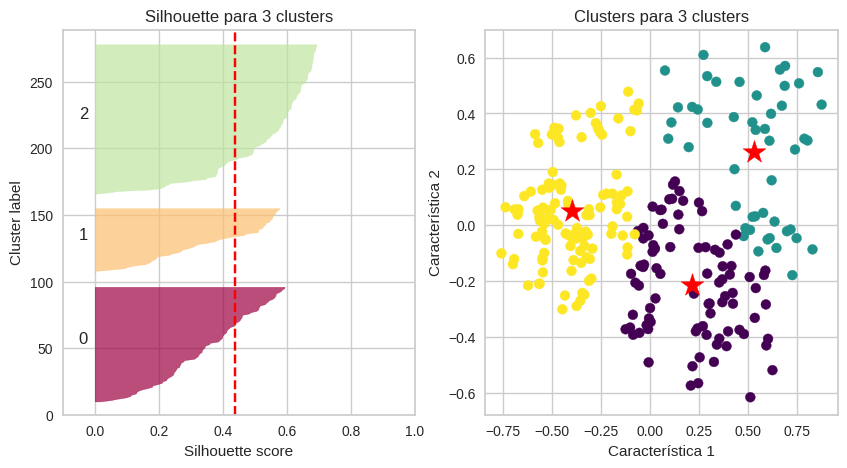

<ipython-input-10-4fbfd3352f7b>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


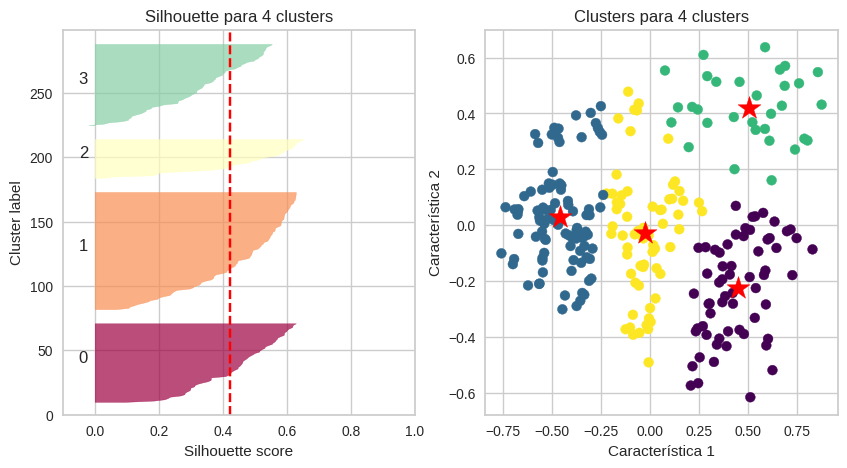

<ipython-input-10-4fbfd3352f7b>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


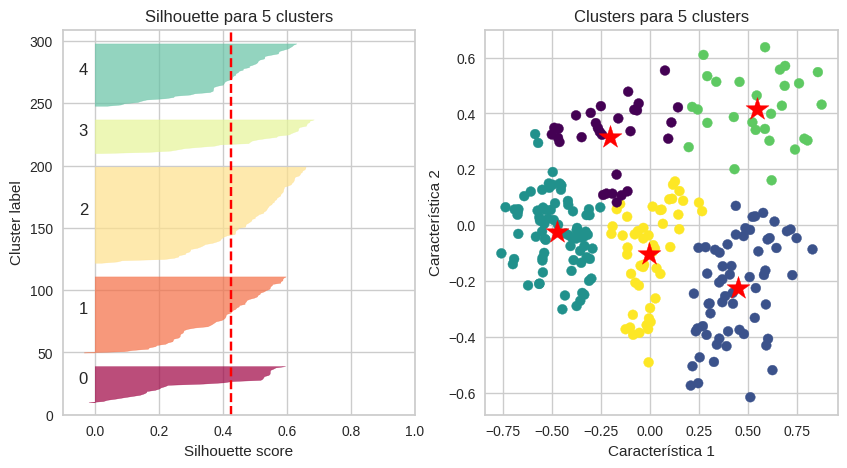

Valores do Silhouette:
Silhouette coefficient 2: 0.47035497090220224
Silhouette coefficient 3: 0.439045552841737
Silhouette coefficient 4: 0.42103873397474584
Silhouette coefficient 5: 0.4271180590289989


In [ ]:
n_clusters = [2, 3, 4, 5]
silhouette_values = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(X)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg =  metrics.silhouette_score(X, cluster_labels)
    silhouette_values.append(silhouette_avg)
    
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    axs[0].set_xlim([-0.1, 1])
    axs[0].set_ylim([0, len(X) + (n + 1) * 10])
    
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.get_cmap("Spectral")(float(i) / n)
        axs[0].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        axs[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    axs[0].set_title(f"Silhouette para {n} clusters")
    axs[0].set_xlabel("Silhouette score")
    axs[0].set_ylabel("Cluster label")
    axs[0].axvline(x=silhouette_avg, color="red", linestyle="--")
    
    centroids = kmeans.cluster_centers_
    axs[1].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[1].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red')
    axs[1].set_title(f"Clusters para {n} clusters")
    axs[1].set_xlabel("Característica 1")
    axs[1].set_ylabel("Característica 2")
    
    plt.show()

print("Valores do Silhouette:")
for i in range(len(n_clusters)):
    print(f"Silhouette coefficient {n_clusters[i]}: {silhouette_values[i]}")

A pontuação da Silhouette é máxima (0.47) para K = 2, mas isso não é suficiente para selecionar o K ideal. Outras condições devem ser analisadas, como:

*   Para cada gráfico de Silhouette, todos os clusters devem ter uma pontuação maior que a pontuação média;
*   Não deve haver grandes flutuações no tamanho dos grupos (largura dos clusters).

A curva de cotovelo e os gráficos de silhueta são técnicas muito úteis para encontrar o K ideal para agrupamento de K-means. Em conjuntos de dados do mundo real, você encontrará muitos casos em que a curva Elbow não é suficiente para encontrar o 'K' correto. Nesses casos, você deve usar o gráfico Silhouette para descobrir o número ideal de clusters para seu conjunto de dados.

Dado todas essas informações, K=3 ou K=2 podem ser considerados valores ideais.

---

### Kmeans (sem usar PCA)

Para efeito de comparação vou demosntrar o Kmeans sem o uso do PCA para dimensionar os dados.

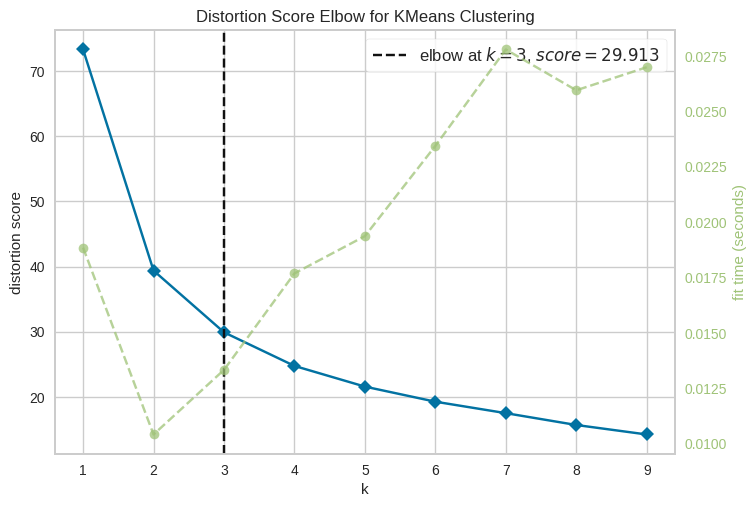

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_init=10)
vis = KElbowVisualizer(kmeans, k=(1,10))
vis.fit(features)
vis.poof()

Assim como na primeira comparação vemos que o K ideal é 3, mas ele também não parece tão óbvio assim.

Com isso vamos utilizar o método da Silhouette novamente para realizar essa análise com outros números de clustering.

---

<ipython-input-12-13941d876aee>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


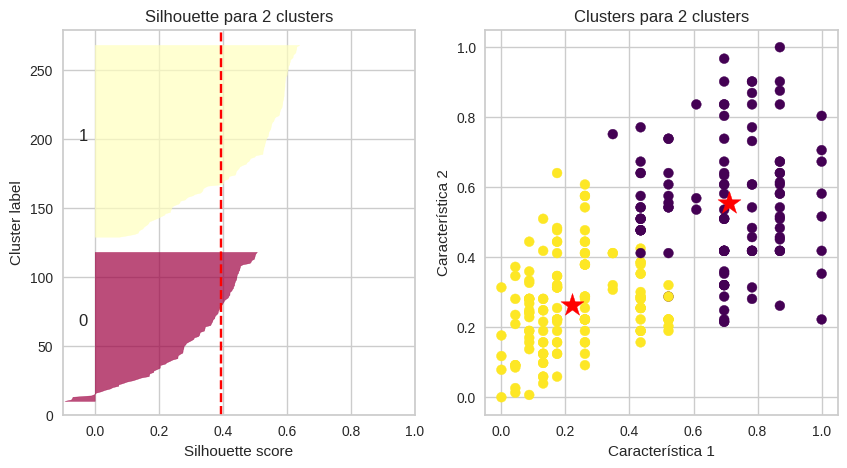

<ipython-input-12-13941d876aee>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


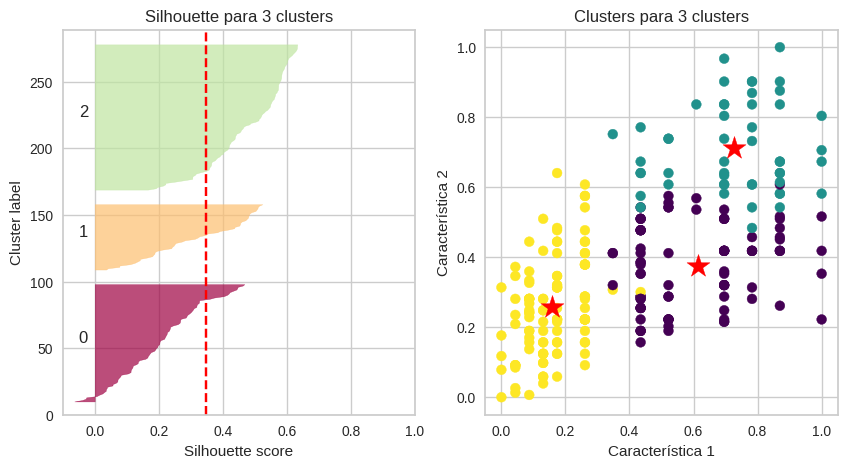

<ipython-input-12-13941d876aee>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


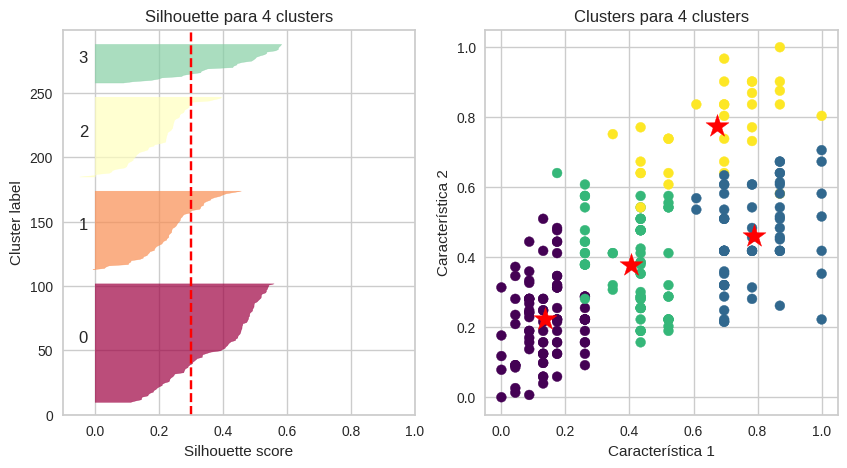

<ipython-input-12-13941d876aee>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n)


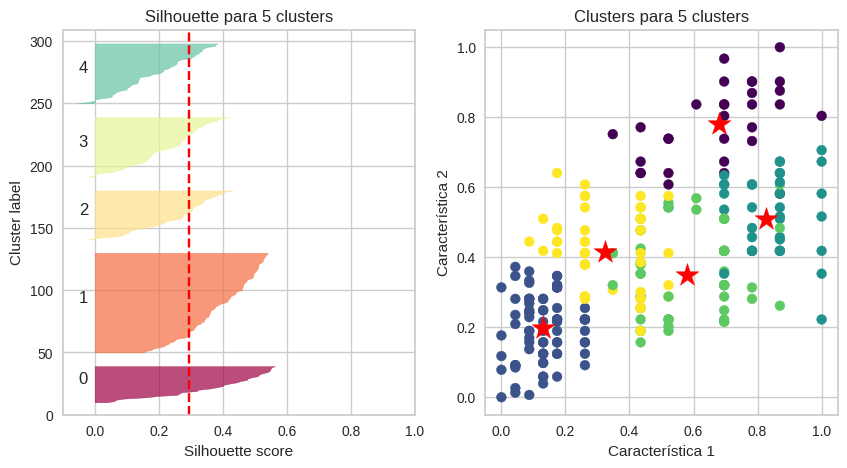

Valores do Silhouette:
Silhouette coefficient 2: 0.39415953648528806
Silhouette coefficient 3: 0.3483999969714683
Silhouette coefficient 4: 0.3018154985080796
Silhouette coefficient 5: 0.29315305177823137


In [ ]:
n_clusters = [2, 3, 4, 5]
silhouette_values = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(features)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg =  metrics.silhouette_score(features, cluster_labels)
    silhouette_values.append(silhouette_avg)
    
    sample_silhouette_values = metrics.silhouette_samples(features, cluster_labels)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    axs[0].set_xlim([-0.1, 1])
    axs[0].set_ylim([0, len(X) + (n + 1) * 10])
    
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.get_cmap("Spectral")(float(i) / n)
        axs[0].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        axs[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    axs[0].set_title(f"Silhouette para {n} clusters")
    axs[0].set_xlabel("Silhouette score")
    axs[0].set_ylabel("Cluster label")
    axs[0].axvline(x=silhouette_avg, color="red", linestyle="--")
    
    centroids = kmeans.cluster_centers_
    axs[1].scatter(features[:, 0], features[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[1].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red')
    axs[1].set_title(f"Clusters para {n} clusters")
    axs[1].set_xlabel("Característica 1")
    axs[1].set_ylabel("Característica 2")
    
    plt.show()

print("Valores do Silhouette:")
for i in range(len(n_clusters)):
    print(f"Silhouette coefficient {n_clusters[i]}: {silhouette_values[i]}")

Com isso, analisando os resultados sem o uso PCA vemos que o plot da Silhouette possui valor médio da Silhouette mais baixo. Além disso, o gráfico de dispersão dos clusters são menos definidos. Isso pode indicar que o uso do PCA é uma boa escolha.

---

## kmedoids

Assim como o algoritmo k-means, k-medoids é um algoritmo particional e tenta minimizar a distância entre pontos rotulando-os em grupos diferentes. O k-medoids minimiza uma soma de dissimilaridades par-a-par em vez de uma soma de distâncias euclidianas ao quadrado, o que o torna mais robusto a ruídos e outliers do que o k-means.


Nesta etapa utilizamos o kmedoids com o intuito de entender como se diferencia do kmeans na mesma base de dados.

In [ ]:
ftrs = dataset.iloc[:, 1:7]

initial_medoids = [1, 50, 170]
feature_values = ftrs.values.tolist()

kmedoids_instance = kmedoids(feature_values, initial_medoids) # instacia gerada
kmedoids_instance.process() # instacia processada
clusters = kmedoids_instance.get_clusters() # clusters salvos
medoids = kmedoids_instance.get_medoids()

cluster_labels = np.zeros([249], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2

cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2])

Como podemos ver abaixo estão as medoids definidas pelo kmedoids, como previamenteo método ELbow definiu que o número de clusters ideal seria 3, aqui podemos ver que também foram definidos 3 clusters diferentes :

In [ ]:
print(medoids)

[25, 129, 171]


Kmedoids

Com todos os dados devidamente agrupados com kmedoids, abaixo está um gráfico de dispersão para demonstrar visualmente como se deu esse agrupamento :

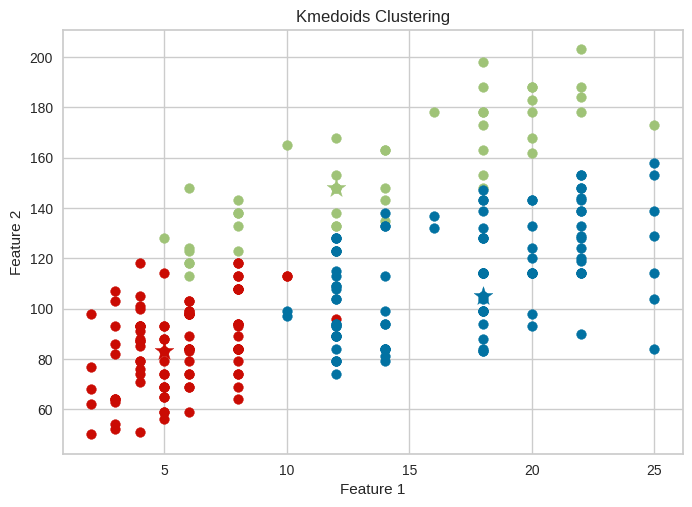

In [ ]:
# Plot the kmedoids clusters
colors = ['r', 'g', 'b']
markers = ['o', 'v', 's', 'D', 'X', '*']
for i, cluster in enumerate(clusters):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    for point_idx in cluster:
        plt.scatter(ftrs.iloc[point_idx, 0], ftrs.iloc[point_idx, 1], c=color, marker='o')
    medoid = medoids[i]
    plt.scatter(ftrs.iloc[medoid, 0], ftrs.iloc[medoid, 1], c=color, marker='*', s=200)

plt.title('Kmedoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Logo abaixo temos também um gráfico barras no silhouette mostrando a diferença de perfomance para uma quantidade de clusters diferentes, onde o padrão é 3 e comparados com números de clusters 2 e 4.

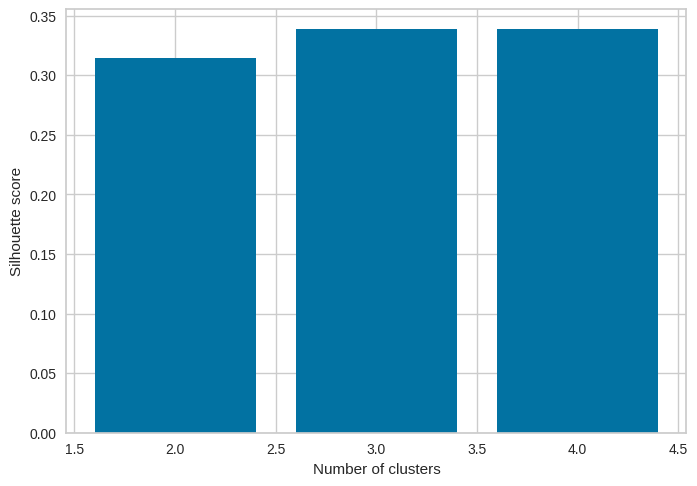

Silhouette score for value  2 :  0.3140795355903868
Silhouette score for value  3 :  0.3384014993380139
Silhouette score for value  4 :  0.3384014993380139


In [ ]:
silhouette_scores = []

for k in [2, 3, 4]:
    initial_medoids = [1, 50, 170][:k]
    kmedoids_instance = kmedoids(feature_values, initial_medoids)
    kmedoids_instance.process()
    cluster_labels = np.zeros(len(feature_values), dtype=int)
    for i, cluster in enumerate(kmedoids_instance.get_clusters()):
        for j in cluster:
            cluster_labels[j] = i
    cluster_medoids = kmedoids_instance.get_medoids()
    silhouette_scores.append(silhouette_score(feature_values, cluster_labels))

plt.bar([2, 3, 4], silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

for z in range(len(silhouette_scores)):
  #print(z)
  print("Silhouette score for value ", z + 2 , ": ", silhouette_scores[z])

Podemos notar que não há uma diferença de performance entre o número de clusters 3 e 4, mostrando que a partir do 3 já é definido o número ideal de clusters como foi dito previamente pelo método Elbow.

In [ ]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('Silhouette coefficient médio para o agrupametno acima = ', silhouette_avg)

Silhouette coefficient médio para o agrupametno acima =  0.34396585527514756


In [ ]:
target = dataset.iloc[:, -1]
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Pureza do agrupamento = ', purity)

Pureza do agrupamento =  0.08032128514056225


## DBSCAN

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering amplamente utilizado em aprendizado de máquina. Ele é capaz de identificar clusters de formas arbitrárias em conjuntos de dados com alta densidade, bem como separar pontos de baixa densidade como ruído ou outliers. O DBSCAN utiliza o conceito de densidade para agrupar pontos em clusters, onde pontos dentro de uma determinada vizinhança são considerados pertencentes ao mesmo cluster.

<blockquote>
A célula abaixo carrega um arquivo csv 'buddymove_holidayiq.csv' usando a biblioteca pandas e mostra as cinco primeiras linhas do dataset.

Essa célula é útil para visualizar uma parte do dataset carregado e ter uma ideia de como as informações estão organizadas e distribuídas nas colunas. A coloração gradiente pode ajudar a destacar padrões e tendências nos dados de uma forma mais visual e intuitiva.
</blockquote>

In [ ]:
dataset = pd.read_csv('buddymove_holidayiq.csv')
dataset.head().style.background_gradient(cmap='YlOrBr').hide_index()

<ipython-input-121-6534d8a0a626>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  dataset.head().style.background_gradient(cmap='YlOrBr').hide_index()


User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 1,2,77,79,69,68,95
User 2,2,62,76,76,69,68
User 3,2,50,97,87,50,75
User 4,2,68,77,95,76,61
User 5,2,98,54,59,95,86


---
<blockquote>
Essa célula realiza a descrição estatística do conjunto de dados lido na célula anterior.

A descrição do conjunto de dados pode ser uma etapa importante na preparação dos dados antes de aplicar técnicas de clustering.
</blockquote>

In [ ]:
dataset.describe(include = "all")

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
unique,249,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,NaN,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,NaN,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,NaN,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,NaN,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,NaN,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000


---
<blockquote>
Nessa etapa estamos selecionando e transformando em array as colunas que contêm as informações relevantes para a nossa análise, ou seja, as características dos usuários relacionadas às avaliações de destinos.

Este array será usado como entrada para a nossa análise de clustering, onde tentaremos agrupar usuários semelhantes com base em suas avaliações.
</blockquote>

In [ ]:
feat = dataset.iloc[:, 1:7].values
feat

array([[  2,  77,  79,  69,  68,  95],
       [  2,  62,  76,  76,  69,  68],
       [  2,  50,  97,  87,  50,  75],
       ...,
       [ 20, 124, 178, 104, 158, 174],
       [ 20, 133, 149, 139, 144, 213],
       [ 20, 143, 149, 139, 159, 143]])

---
<blockquote>
Na sequência aplicamos a técnica de normalização que transforma os dados de forma que eles fiquem dentro do intervalo [0, 1].

A normalização é útil porque ajuda a melhorar o desempenho do modelo, reduzindo a sensibilidade a valores discrepantes e melhorando a precisão dos resultados.
</blockquote>

In [ ]:
normalize = MinMaxScaler()
feat = normalize.fit_transform(feat)
feat

array([[0.        , 0.17647059, 0.10150376, 0.06493506, 0.09836066,
        0.21656051],
       [0.        , 0.07843137, 0.09022556, 0.11038961, 0.10382514,
        0.04458599],
       [0.        , 0.        , 0.16917293, 0.18181818, 0.        ,
        0.08917197],
       ...,
       [0.7826087 , 0.48366013, 0.47368421, 0.29220779, 0.59016393,
        0.71974522],
       [0.7826087 , 0.54248366, 0.36466165, 0.51948052, 0.5136612 ,
        0.96815287],
       [0.7826087 , 0.60784314, 0.36466165, 0.51948052, 0.59562842,
        0.52229299]])

---
<blockquote>
Na sequência calculamos a distância de cada ponto ao seu vizinho mais próximo usando o método NearestNeighbors e plotamos os dados.

Este gráfico ajuda a visualizar a distribuição das distâncias entre os pontos e é usado para escolher um valor adequado de eps para o algoritmo DBSCAN. O valor de eps é escolhido de tal forma que o gráfico da distância apresenta um "joelho" acentuado, que indica uma mudança na densidade dos dados e um bom valor para separar os clusters.
</blockquote>

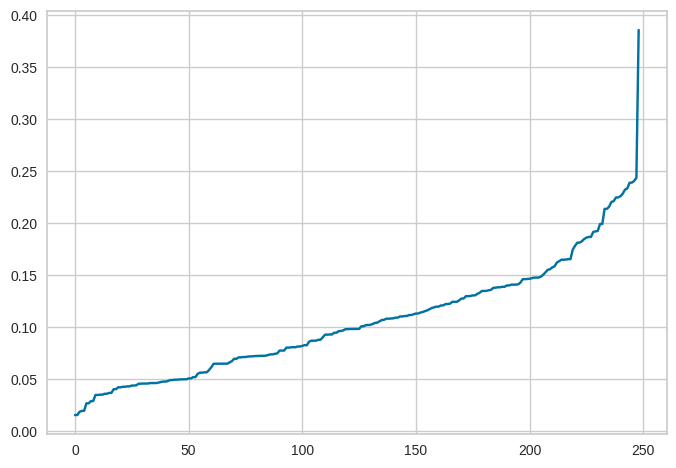

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(feat)
distances, indices = nbrs.kneighbors(feat)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

---
<blockquote>
Aqui implentamos o DBSCAN para buscar o melhor eps (atribuímos arbitrariamente min_samples=3).

O DBSCAN é usado para diferentes valores de epsilon (eps) e imprime o valor médio do índice de silhueta para cada valor de eps. O índice de silhueta é uma medida de quão bem os objetos estão agrupados em seus respectivos clusters.
</blockquote>

In [ ]:
range_eps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
for i in range_eps:
  db = DBSCAN(eps=i, min_samples=3)
  db.fit(feat)
  labels = db.labels_
  silhouetteAvg =  metrics.silhouette_score(feat, labels)
  print("For eps value = "+str(i),"=>","The avg silhouette is :", silhouetteAvg)

For eps value = 0.05 => The avg silhouette is : -0.12371995074698884
For eps value = 0.1 => The avg silhouette is : -0.042137519323827394
For eps value = 0.15 => The avg silhouette is : 0.11643473948871555
For eps value = 0.2 => The avg silhouette is : 0.1305682055177993
For eps value = 0.25 => The avg silhouette is : 0.3421029801815214
For eps value = 0.3 => The avg silhouette is : 0.3421029801815214


---
<blockquote>
A partir dos resulados anteriores, ajustamos o valor de eps para 0.25 por ter o maior silhouette

Com isso, utilizamos o novo valor de eps selecionado na etapa anterior, realizamos a clusterização final e imprimimos o número estimado de clusters e o número estimado de pontos ruidosos (outliers) encontrados pelo DBSCAN.
</blockquote>

In [ ]:
m = DBSCAN(eps=0.25, min_samples=10)
m.fit(feat)
clusters = m.labels_
print(set(clusters))
n_clusters_ = len(set(clusters))
n_noise_ = list(clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

{0, 1, 2, -1}
Estimated number of clusters: 4
Estimated number of noise points: 40


---
Por fim, essa linha de código gera um gráfico de dispersão (scatter plot) dos dados contidos na variável feat, onde cada ponto é colorido de acordo com o cluster a que pertence, utilizando as informações contidas na variável clusters.

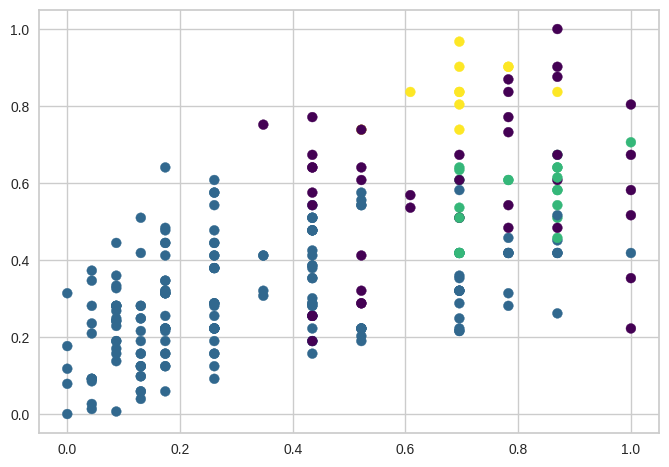

In [ ]:
plt.scatter(feat[:, 0], feat[:, 1], c=clusters, s=50, cmap='viridis')